# Data Wrangling Project - WeRateDogs
## Insights

In [65]:
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv('twitter_archive_master.csv')

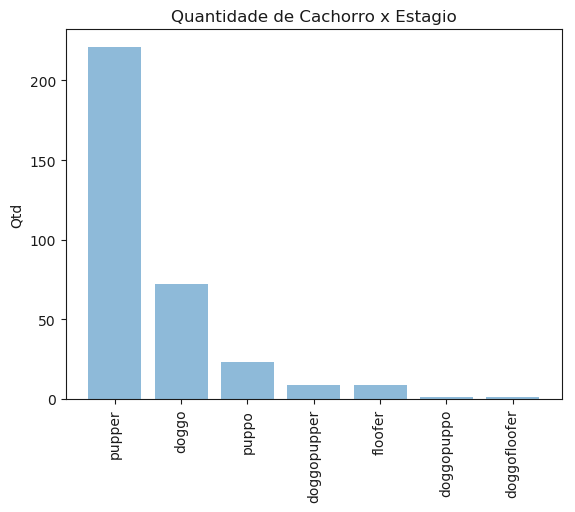

In [49]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

df_count = df.loc[df.retweeted_status_id.isnull() & 
                  df.in_reply_to_status_id.isnull()].dog_stage.value_counts()
 
objects = df_count.keys().tolist()
y_pos = np.arange(len(objects))
performance = df_count.tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Qtd')
plt.title('Quantidade de Cachorro x Estagio')
plt.xticks(rotation=90)

plt.show()

### Gráfico de Comparação Quantidade de Cachorro x Estágio
- Como pode ser visto no grafico de comparação acima, a maior parte dos cachorros estão classificados no estágio `pupper`, esta classificação representa mais que o dobro das classificações do segundo maior estágio `doggo`, contando com mais de 200 animais nesse estágio.
- Um ponto a se destacar é que existem cachorros com mais de uma classifição, por exemplo, `doggopupper`

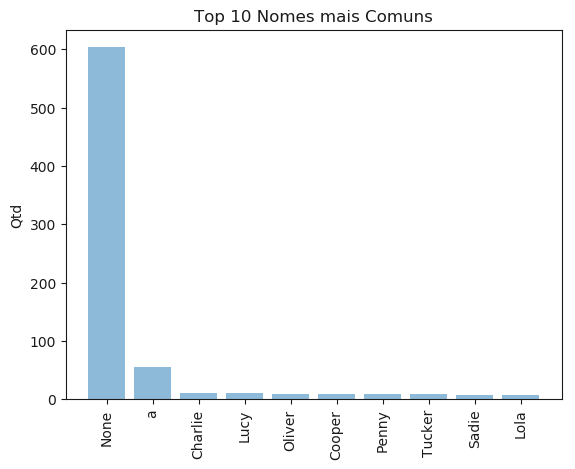

In [117]:
df_count = df.loc[df.retweeted_status_id.isnull() & 
                  df.in_reply_to_status_id.isnull() &
                  df.name.notnull()]

df_count = df_count.name.value_counts().nlargest(10)


objects = df_count.keys().tolist()
y_pos = np.arange(len(objects))
performance = df_count.tolist()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Qtd')
plt.title('Top 10 Nomes mais Comuns')
plt.xticks(rotation=90)

plt.show()

### Gráfico top 10 Nomes mais comuns
- Como pode ser visto a maioria dos tweets não foi possível identificar o nome dos cachorros, o que já era esperado, pois existiam muitos tweets onde a foto tinha mais de 1 cachorro, essa quantidade enorme de tweets sem a classificação do nome leva a distorção da escala do grafico, pois, existem quase 600 tweets sem a classificação do nome, enquanto os demais nomes no Top 10, nao chega nem perto de 100.

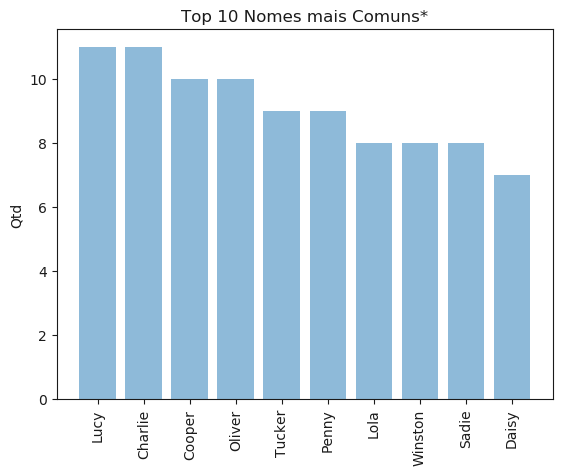

In [124]:
df_count = df.loc[df.retweeted_status_id.isnull() & 
                  df.in_reply_to_status_id.isnull() &
                  df.name.notnull()]

df_count = df_count.query("name != 'None' & name != 'a' & name != 'the'").name.value_counts().nlargest(10)

objects = df_count.keys().tolist()
y_pos = np.arange(len(objects))
performance = df_count.tolist()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Qtd')
plt.title('Top 10 Nomes mais Comuns*')
plt.xticks(rotation=90)

plt.show()


### Gráfico top 10 Nomes mais comuns
#### Retirando Nomes sem sentido
- Quando se retira do data set os tweets que possuem classificação de nomes sem sentido, tais como: `None` `a` `the` , é possível visualizar novos nomes entrando no Top 10. Nomes como `Daisy` `Winston` não apareciam anteriormente no grafico de Top 10, pois estavam sendo ocultados devido a classificação dos nomes sem sentidos.